In [6]:
import imblearn
import numpy as np
from collections import Counter
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print(imblearn.__version__, np.__version__)

0.12.4 2.1.2


Counter({np.int64(1): 1625, np.int64(4): 483, np.int64(8): 466, np.int64(6): 310, np.int64(5): 287, np.int64(2): 233, np.int64(7): 52, np.int64(3): 30})
Class=8, n=466 (13.368%)
Class=5, n=287 (8.233%)
Class=1, n=1625 (46.615%)
Class=6, n=310 (8.893%)
Class=4, n=483 (13.855%)
Class=2, n=233 (6.684%)
Class=3, n=30 (0.861%)
Class=7, n=52 (1.492%)


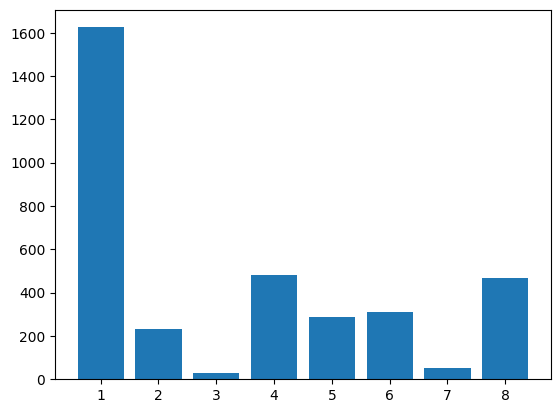

In [9]:
X = np.loadtxt('AI201_PA3_ANN_Data/data.csv', delimiter=',', dtype=float)
y = np.loadtxt('AI201_PA3_ANN_Data/data_labels.csv', delimiter=',', dtype=int)
counter = Counter(y)
print(counter)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
y = LabelEncoder().fit_transform(y)
oversample = imblearn.over_sampling.SMOTE(random_state=42)
X_new, y_new = oversample.fit_resample(X, y)

Class=7, n=1625 (46.615%)
Class=4, n=1625 (46.615%)
Class=0, n=1625 (46.615%)
Class=5, n=1625 (46.615%)
Class=3, n=1625 (46.615%)
Class=1, n=1625 (46.615%)
Class=2, n=1625 (46.615%)
Class=6, n=1625 (46.615%)


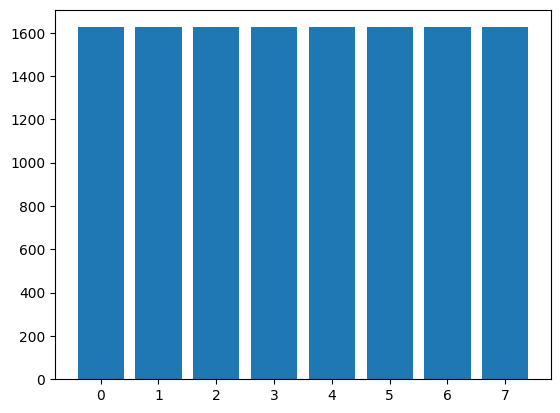

In [8]:
counter = Counter(y_new)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y_new + 1,
    test_size=800,
    random_state=42
)

np.savetxt('training_set.csv', X_train, delimiter=',')
np.savetxt('validation_set.csv', X_test, delimiter=',')
np.savetxt('training_labels.csv', y_train, delimiter=',')
np.savetxt('validation_labels.csv', y_test, delimiter=',')